In [1]:
import pandas as pd
import numpy as np
import math
from scipy.stats import weibull_min, invweibull, uniform, norm
from scipy.interpolate import interp1d

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from pylab import rcParams

import seaborn as sns

import helpers

sns.set()

rcParams['figure.figsize'] = 30,30

# Create the P function from matlab
data = np.loadtxt("powermat.csv", delimiter=",")
x = np.arange(0,30,0.001)
P = interp1d(x,data, fill_value="extrapolate")

# Creating lambda function allowing faster calculations
calculate_power = lambda x: P(x)
#_ = plt.plot(x,P(x))

n = 100000

hlp = helpers.helper_methods(n)
hlp.init_winds()

jan Mean: 1728948.6428780905 ± 7594.390559393438, Var: 1501321531877.4514
feb Mean: 1568696.631931083 ± 7515.878714022365, Var: 1470440255203.4172
mar Mean: 1457103.0160767748 ± 7433.066200528728, Var: 1438215148413.2283
apr Mean: 1189274.7816355475 ± 7101.487994918984, Var: 1312763737556.707
may Mean: 1138435.9242110874 ± 6984.8885573135185, Var: 1270009062840.7258
jun Mean: 1208259.9475854477 ± 7146.2834456488135, Var: 1329377527216.6357
jul Mean: 1142391.5290066416 ± 6993.045496433071, Var: 1272977022989.9746
aug Mean: 1208302.1993704375 ± 7152.340576367044, Var: 1331632021041.9216
sep Mean: 1454758.1736958413 ± 7415.023300822528, Var: 1431241424191.509
oct Mean: 1590080.4725027722 ± 7630.19486654878, Var: 1515511081359.5208
nov Mean: 1740039.13580485 ± 7595.1688947568255, Var: 1501629283108.1218
dec Mean: 1737683.1592744135 ± 7584.25183045708, Var: 1497315593184.912


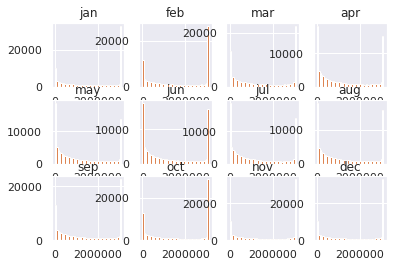

In [2]:
# A) Expected amount of power
i = 1

for key, wind in hlp.winds.items():

    # Plotting
    plt.subplot(3,4,i)
    i+=1
    plt.hist(wind["wind"], bins=100, density=True)
    plt.gca().set_title(key)

    # Calculated power from the generated wind
    power = P(wind["wind"])
    hist = plt.hist(power, bins=50)

    # Calculating mean, variance and the confidence interval for the mean
    mean = np.mean(power)
    var = np.var(power)
    confidence_interval = 1.96*np.sqrt(var/n)

    print(f'{key} Mean: {mean} ± {confidence_interval}, Var: {var}')

jan Mean: 1730352.3124002968 ± 6610.434855931565, Var: 1137490862778.9194
feb Mean: 1570937.5864348507 ± 6524.476784876046, Var: 1108100721480.2808
mar Mean: 1467651.1799701473 ± 6426.705015666383, Var: 1075138935818.1862
apr Mean: 1186923.4413888631 ± 5935.733256013424, Var: 917142057646.39
may Mean: 1141761.7843871387 ± 5841.6342912126265, Var: 888293710752.5835
jun Mean: 1210372.5765951932 ± 5989.837462125852, Var: 933937755692.583
jul Mean: 1137565.4814776503 ± 5830.343434196614, Var: 884863196602.446
aug Mean: 1209287.8874094728 ± 5995.668271844229, Var: 935756924875.0405
sep Mean: 1444629.6824479583 ± 6401.749476460113, Var: 1066805402940.3721
oct Mean: 1582146.440236366 ± 6524.899936664028, Var: 1108244460211.3245
nov Mean: 1731359.6667889636 ± 6598.254392721366, Var: 1133302817343.4714
dec Mean: 1727522.3944505306 ± 6609.260490533025, Var: 1137086740725.7612


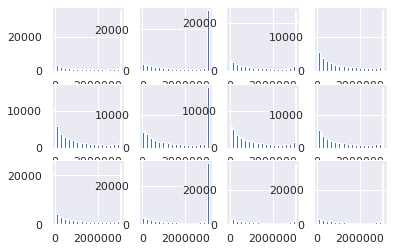

In [4]:
# A) Expected amount of power, truncated version
i = 1

for key, wind in hlp.winds.items():

    # Calculating F(3) and F(25) for the distribution for the wind
    F_min = wind["dist"].cdf(3)
    F_max = wind["dist"].cdf(25)

    # Generate uniform data
    u = uniform.rvs(size=n)

    # Fix condition to U
    u = ((F_max-F_min)*u + F_min)

    # Run u through inverse of weibull 
    wind_truncated = wind["dist"].ppf(u)

    # Calculated the power for the truncated wind
    power_trunc = calculate_power(wind_truncated)

    plt.subplot(3,4,i)
    i+=1
    hist = plt.hist(power_trunc, bins=50)

    # Calculating mean, variance and the confidence interval for the mean
    mean = np.mean(power_trunc)*(F_max-F_min)
    var = np.var(power_trunc)*((F_max-F_min)**2)
    confidence_intervall = 1.96*np.sqrt(var/n)

    print(f'{key} Mean: {mean} ± {confidence_intervall}, Var: {var}')

Mean: 1732149.7295784904 ± 2957.201536306225, Var: 227640590543.83328
Mean: 1568043.0123897046 ± 3109.4870503500365, Var: 251689653173.01562
Mean: 1467974.1090244544 ± 3448.8112933067864, Var: 309618370909.0074
Mean: 1187501.358049204 ± 3803.9008047327156, Var: 376657156711.9482
Mean: 1142144.6389388202 ± 3900.8795906653436, Var: 396107392255.03485
Mean: 1217215.3479220476 ± 3761.4125003797344, Var: 368289879165.2677
Mean: 1140885.3638423951 ± 3910.36832063486, Var: 398036766009.5974
Mean: 1210677.1990202884 ± 3761.040736898942, Var: 368217082065.11194
Mean: 1446200.5277135302 ± 3532.171158435348, Var: 324766584040.0486
Mean: 1587024.1708025066 ± 2772.338834336395, Var: 200069309984.63354
Mean: 1729606.5713933452 ± 2969.3258724779507, Var: 229511040633.25024
Mean: 1731321.8422014834 ± 2983.9465978989274, Var: 231776793500.43164


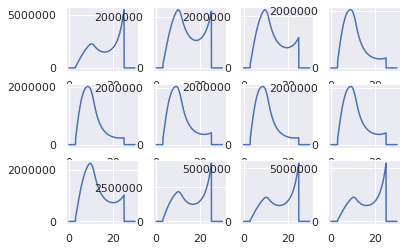

In [5]:
x = np.linspace(0,30, num=n)
i = 1

for key, wind in hlp.winds.items():

    h = lambda x: P(x)*wind["dist"].pdf(x)

    # Selecting g as a normal distribution
    my = 12
    sigma2 = 4.3
    g_scale = 10**6.4
    g_dist = norm(my, sigma2)
    g = lambda x: g_dist.pdf(x)

    plt.subplot(3,4,i)
    i+=1
    plt.plot(x, h(x)/g(x))

    X = g_dist.rvs(size=n)

    # Function to evaluate
    s = lambda x: h(x)/g(x)

    # Calculate variance
    mean = np.mean(s(X))
    var = np.var(s(X))
    confidence_interval = 1.96*np.sqrt(var/n)

    print(f'Mean: {mean} ± {confidence_interval}, Var: {var}')

1743413.085296709
1741678.1388730335
1961978831366.8782
1962690317669.6326
1742545.6120848712
Mean: 1744293.75 ± 5035.248754611769, Var: 659978394960.9375


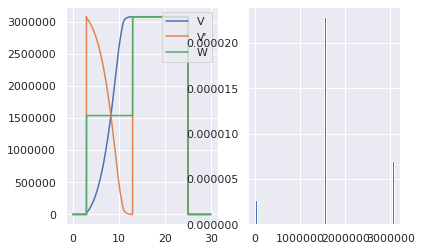

In [7]:
# Letting V = P, and V' = Max(P) - P, unsure if this has increased complexity
V_1 = P
V_2 = lambda x: np.where((x >= 3) & (x <= 13), -P(x) + P(13), P(x))
W = lambda x: (V_1(x) + V_2(x))/2

plt.subplot(1, 2, 1)

plt.plot(x, V_1(x), label = "V")
plt.plot(x, V_2(x), label = "V'")
plt.plot(x, W(x), label = "W")

plt.legend(loc='upper right')

plt.subplot(1, 2, 2)

print(np.mean(V_1(x)))
print(np.mean(V_2(x)))
print(np.var(V_1(x)))
print(np.var(V_2(x)))
print(np.mean(W(x)))

power_as = W(wind)
hist = plt.hist(power_as, density=True, bins=100)

# Calculating mean, variance and the confidence interval for the mean
mean = np.mean(power_as)
var = np.var(power_as)
confidence_intervall = 1.96*np.sqrt(var/n)

print(f'Mean: {mean} ± {confidence_intervall}, Var: {var}')

In [8]:
# Probability that the turbine delivers power
print(f'Prob for delivering power: {(F_max - F_min)*100}%')

Prob for delivering power: 91.91850832071029%


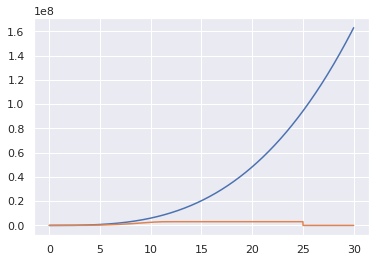

In [9]:
Ptot = lambda v: 1/2*1.225*math.pi*112**2/4*v**3

plt.plot(x,Ptot(x))
plt.plot(x,P(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
Mean: 0.3020610277095172 ± 0.00046305417886876557, Var: 0.005581506991040888


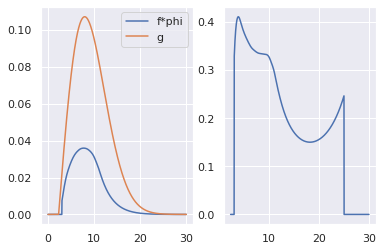

In [10]:
with np.errstate(divide='ignore', invalid='ignore'):
    _ = plt.plot(x, P(x)/Ptot(x))

x = np.linspace(0,30, num=n)

power_ratio = lambda x: np.where(P(x) == 0, 0, P(x)/Ptot(x))


# Selecting g as a weibull distribution
g_dist_lambda = 8 
g_dist_k = 2
g_dist = weibull_min(g_dist_k, loc = 2.3, scale = g_dist_lambda)
g = lambda x: g_dist.pdf(x)

plt.subplot(1,2,1)

plt.plot(x,power_ratio(x)*wind_distribution.pdf(x), label='f*phi')
plt.plot(x, g(x), label = 'g')
plt.legend()

plt.subplot(1,2,2)

plt.plot(x, wind_distribution.pdf(x)*power_ratio(x)/g(x))

X = g_dist.rvs(size=n)

# Function to evaluate
s = lambda x: wind_distribution.pdf(x)*power_ratio(x)/g(x)

# Calculate variance
mean = np.mean(s(X))
var = np.var(s(X))
confidence_interval = 1.96*np.sqrt(var/n)

print(f'Mean: {mean} ± {confidence_interval}, Var: {var}')

Mean: 3236489.6055301637 ± 5761.74721765121, Var: 864164176387.741


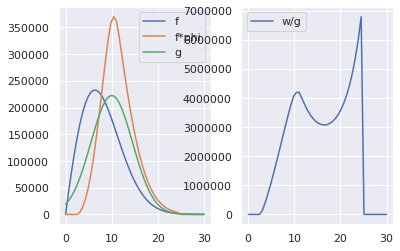

In [27]:
# Uppgift 3
# A
k = 1.96
lamda = 9.13

# Creating the marginal wind distribution
wind_distribution =  weibull_min(k,loc=0, scale=lamda)

# Draw wind 1 
v1 = wind_distribution.rvs(n)

# Constants
# a = 0.638
# p = 3
# q = 1.5

# Conditional f(v2 | v1)
# cond_f = lambda v2: wind_distribution.pdf(v2)*(1+a*(1-F1**p)**(q-1)*(1-wind_distribution.cdf(v2)**p)**(q-1)*(F1**p*(1+p*q)-1)*(wind_distribution.cdf(v2)**p*(1+p*q)-1)) 

# Total power
phi = lambda x: 2*P(x)

# Selecting g as a normal distribution
my = 10
sigma2 = 4.5
g_scale = 10**6.4
g_dist = norm(my, sigma2)

g = lambda x: g_dist.pdf(x)

x = np.linspace(0, 30, 50)

plt.subplot(1,2,1)
plt.plot(x, g_scale*wind_distribution.pdf(x), label="f")
plt.plot(x, wind_distribution.pdf(x)*phi(x), label="f*phi")
plt.plot(x, g_scale*g(x), label="g")
plt.legend()

plt.subplot(1,2,2)
plt.plot(x, wind_distribution.pdf(x)*phi(x)/g(x), label="w/g")
plt.legend()

s = lambda x: wind_distribution.pdf(x)*phi(x)/g(x)

sample = s(X)

# Calculate variance
mean = np.mean(sample)
var = np.var(sample)
confidence_interval = 1.96*np.sqrt(var/n)

print(f'Mean: {mean} ± {confidence_interval}, Var: {var}')

In [127]:
cond_f(1,1)

TypeError: <lambda>() takes 1 positional argument but 2 were given